<a href="https://colab.research.google.com/github/superMiii/SKRIPSI_event_modeling/blob/master/Skripsi_Sistem_Rekomendasi_Event_CBF_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

!pip install rake-nltk
!pip install Sastrawi
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
event = pd.read_excel('event.xlsx')
event.head()

,ID Event,Nama Event,Jenis Event,Tahun Event,Tanggal Pelaksanaan Event,Waktu Dimulai Event,Tempat pelaksanaan event,Deskripsi Event,Tags,Upload Gambar/Poster Event
0,event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,2021,15/12/2021,08:30:00,Youtube Channel Universitas Muhammadiyah Sukabumi,Moderasi islam Berkemajuan\nDalam Bingkai Kein...,#Webinar #Keislaman #UniversitasMuhammadiyahSu...,https://drive.google.com/uc?id=1VHyV-Qwgyrqeae...
1,event002,Program Bangkit 2022 Registration,Beasiswa,2021,31/12/2021,NaN,Full Online,Bangkit 2022 akan berlangsung sedikitnya selam...,#beasiswa #bangkit2022 #Viral #Beasiswa #Unive...,https://drive.google.com/uc?id=1tsY6pfNX9d6WxB...
2,event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,2020,13/08/2020,13:30:00,Zoom Cloud Meeting Online,*BEM UNIVERSITAS MUHAMMADIYAH SUKABUMI 2020 Pr...,#webinar #kewirausahaan #bemummi #ekonomiKreatif,https://drive.google.com/uc?id=1snJINeZwEykQsk...
3,event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,2020,06/08/2020,14:00:00,Live Youtube Channel Google Indonesia,*Kelas Gratis Wirausaha dari Google Womenwill ...,#kelasOnlineGratis #kelasOnline #bemummi #work...,https://drive.google.com/uc?id=1OsaYdTvtDQ6RIi...
4,event005,ITech 5.0 How To Build Start Up Business Suces...,Webinar,2021,05/12/2021,08:30:00,Zoom Meeting Online,[ITECH 5.0 by TI '20 PROUDLY PRESENTS]\n\nWEBI...,#informatika #teknikinformatika #informatika_u...,https://drive.google.com/uc?id=1xMoNkPx-HYPBQ6...


# Data Understanding
library yang digunakan dan read raw dataset.

##Visualisasi Data

###Jumlah Data Berdasarkan Jenis Event

Visualisasi jumlah data menggunakan matplotlib berdasarkan kolom 'Jenis Event'.

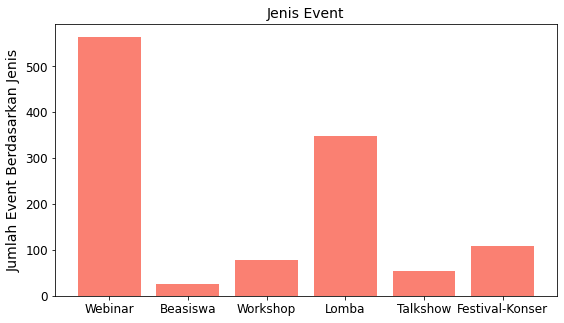

[564, 26, 78, 348, 55, 109]

In [18]:
webinar_event = len(event[event['Jenis Event'] == 'Webinar'])
lomba_event = len(event[event['Jenis Event'] == 'Lomba'])
workshop_event = len(event[event['Jenis Event'] == 'Workshop'])
talkshow_event = len(event[event['Jenis Event'] == 'Talkshow'])
beasiswa_event = len(event[event['Jenis Event'] == 'Beasiswa'])
festival_event = len(event[event['Jenis Event'] == 'Festival-Konser'])
len_by_jenis_event = [webinar_event, beasiswa_event, workshop_event, lomba_event, talkshow_event, festival_event]
jenis_event_unique = event['Jenis Event'].unique()
jenis_event_unique

plt.figure(figsize=(9,5))
plt.bar(jenis_event_unique, len_by_jenis_event, color='salmon')

plt.title('Jenis Event', size=14)
plt.ylabel('Jumlah Event Berdasarkan Jenis', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()
len_by_jenis_event

###Jenis Event

Visualisasi persentase data menggunakan matplotlib berdasarkan kolom 'Jenis Event'.

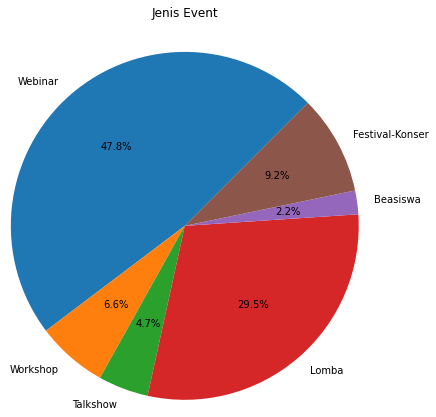

In [19]:
value_count_jenis = event['Jenis Event'].value_counts()
value_count_jenis

fig,ax = plt.subplots()
ax.pie([value_count_jenis['Webinar'],
        value_count_jenis['Workshop'],
        value_count_jenis['Talkshow'],
        value_count_jenis['Lomba'],
        value_count_jenis['Beasiswa'],
        value_count_jenis['Festival-Konser']],
        labels=['Webinar','Workshop','Talkshow', 'Lomba', 'Beasiswa', 'Festival-Konser'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Jenis Event", pad=100)
plt.show()


###Tahun Event

Visualisasi persentase data menggunakan matplotlib berdasarkan kolom 'Tahun Event'.

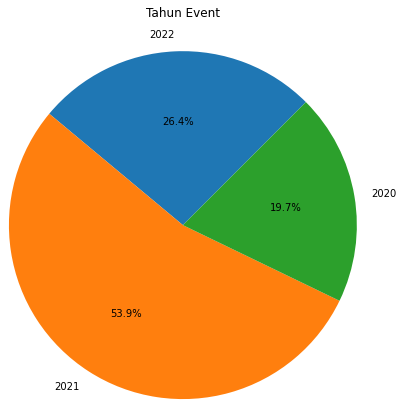

In [20]:
value_count_tahun = event['Tahun Event'].value_counts()
value_count_tahun

fig,ax = plt.subplots()
ax.pie([value_count_tahun[2022],
        value_count_tahun[2021],
        value_count_tahun[2020]],
        labels=['2022','2021','2020'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Tahun Event", pad=100)
plt.show()

In [21]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID Event                    1180 non-null   object
 1   Nama Event                  1180 non-null   object
 2   Jenis Event                 1180 non-null   object
 3   Tahun Event                 1180 non-null   int64 
 4   Tanggal Pelaksanaan Event   1180 non-null   object
 5   Waktu Dimulai Event         1007 non-null   object
 6   Tempat pelaksanaan event    1180 non-null   object
 7   Deskripsi Event             1180 non-null   object
 8   Tags                        1180 non-null   object
 9   Upload Gambar/Poster Event  1180 non-null   object
dtypes: int64(1), object(9)
memory usage: 92.3+ KB


In [22]:
print("Jumlah seluruh event : ", len(event['ID Event'].unique()))
print('=======================================================================================')
print("Banyak jenis event : ", len(event['Jenis Event'].unique()))
print("jenis event : ", event['Jenis Event'].unique())
print('=======================================================================================')
print("Jumlah tahun pelaksanaan event : ", len(event['Tahun Event'].unique()))
print("Rentang tahun event : ", event['Tahun Event'].unique())

Jumlah seluruh event :  1180
Banyak jenis event :  6
jenis event :  ['Webinar' 'Beasiswa' 'Workshop' 'Lomba' 'Talkshow' 'Festival-Konser']
Jumlah tahun pelaksanaan event :  3
Rentang tahun event :  [2021 2020 2022]


In [23]:
event.columns = ['event_id', 'nama_event', 'jenis_event', 'tahun_event', 'tanggal_event', 'waktu_event', 'tempat_event', 'deskripsi_event', 'tags', 'poster']
event

,event_id,nama_event,jenis_event,tahun_event,tanggal_event,waktu_event,tempat_event,deskripsi_event,tags,poster
0,event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,2021,15/12/2021,08:30:00,Youtube Channel Universitas Muhammadiyah Sukabumi,Moderasi islam Berkemajuan\nDalam Bingkai Kein...,#Webinar #Keislaman #UniversitasMuhammadiyahSu...,https://drive.google.com/uc?id=1VHyV-Qwgyrqeae...
1,event002,Program Bangkit 2022 Registration,Beasiswa,2021,31/12/2021,NaN,Full Online,Bangkit 2022 akan berlangsung sedikitnya selam...,#beasiswa #bangkit2022 #Viral #Beasiswa #Unive...,https://drive.google.com/uc?id=1tsY6pfNX9d6WxB...
2,event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,2020,13/08/2020,13:30:00,Zoom Cloud Meeting Online,*BEM UNIVERSITAS MUHAMMADIYAH SUKABUMI 2020 Pr...,#webinar #kewirausahaan #bemummi #ekonomiKreatif,https://drive.google.com/uc?id=1snJINeZwEykQsk...
3,event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,2020,06/08/2020,14:00:00,Live Youtube Channel Google Indonesia,*Kelas Gratis Wirausaha dari Google Womenwill ...,#kelasOnlineGratis #kelasOnline #bemummi #work...,https://drive.google.com/uc?id=1OsaYdTvtDQ6RIi...
4,event005,ITech 5.0 How To Build Start Up Business Suces...,Webinar,2021,05/12/2021,08:30:00,Zoom Meeting Online,[ITECH 5.0 by TI '20 PROUDLY PRESENTS]\n\nWEBI...,#informatika #teknikinformatika #informatika_u...,https://drive.google.com/uc?id=1xMoNkPx-HYPBQ6...
...,...,...,...,...,...,...,...,...,...,...
1175,event1176,MILLENNIAL PRENEUR BAZNAS,Workshop,2020,15 - 30 Jul 2020,09:00 - 16:00,Dalam Jaringan (Online),📌 PELATIHAN ENTREPRENEUR 📌\n \n• Punya bisnis ...,#entrepreneur #wirausaha #kewirausahaan #workshop,https://eventkampus.com/data/event/poster/16/_...
1176,event1177,HARI ANAK NASIONAL 2020 KOTA SEMARANG,Festival-Konser,2020,23 Jul 2020 - 18 Agu 2020,07:30 - 20:30,Dalam Jaringan (Online),HARI ANAK NASIONAL 2020 KOTA SEMARANG\n \nPeri...,#harianak #festival #konser #webinar,https://eventkampus.com/data/event/poster/16/_...
1177,event1178,Content Marketing Camp,Lomba,2020,01 Jul 2020 - 30 Sep 2020,NaN,Online,Marketing Prsent Camp (Pelatihan Marketing Dig...,#contentCreator #content #kontenkreator #webin...,https://eventkampus.com/data/event/poster/16/_...
1178,event1179,INFEST TALK,Webinar,2020,25 - 25 Jul 2020,09:00,Via ZOOM,Infest Talk (detail check poster),#pandemic #covid #newnormal #webinar,https://eventkampus.com/data/event/poster/16/_...


#Data Preprocessing

###Pengambilan Atribut Data 

Dari info di atas, diketahui bahwa dataset memiliki 10 atribut. Namun, hanya beberapa atribut yang akan digunakan untuk pemodelan sistem rekomendasi yaitu :

1. ID Event
2. Nama Event
3. Jenis Event
4. Tags

In [24]:
event_keys = event[['event_id', 'nama_event', 'jenis_event', 'tags']]
event_keys.head()

,event_id,nama_event,jenis_event,tags
0,event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,#Webinar #Keislaman #UniversitasMuhammadiyahSu...
1,event002,Program Bangkit 2022 Registration,Beasiswa,#beasiswa #bangkit2022 #Viral #Beasiswa #Unive...
2,event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,#webinar #kewirausahaan #bemummi #ekonomiKreatif
3,event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,#kelasOnlineGratis #kelasOnline #bemummi #work...
4,event005,ITech 5.0 How To Build Start Up Business Suces...,Webinar,#informatika #teknikinformatika #informatika_u...


# Data Preparation
###Cek mising value

In [25]:
event_keys.isnull().sum()

event_id       0
nama_event     0
jenis_event    0
tags           0
dtype: int64

### Cek apakah ada duplikasi nilai pada kolom

In [26]:
event_keys.duplicated().value_counts()

False    1180
dtype: int64

In [27]:
#jika ada yang data yang duplikat, hapus menggunakan perintah berikut
event_keys.drop_duplicates()
event_keys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   event_id     1180 non-null   object
 1   nama_event   1180 non-null   object
 2   jenis_event  1180 non-null   object
 3   tags         1180 non-null   object
dtypes: object(4)
memory usage: 37.0+ KB


### Cek apakah ada string aneh seperti emoji dan lain lain.

In [28]:
event_keys.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
event_keys

,event_id,nama_event,jenis_event,tags
0,event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,#Webinar #Keislaman #UniversitasMuhammadiyahSu...
1,event002,Program Bangkit 2022 Registration,Beasiswa,#beasiswa #bangkit2022 #Viral #Beasiswa #Unive...
2,event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,#webinar #kewirausahaan #bemummi #ekonomiKreatif
3,event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,#kelasOnlineGratis #kelasOnline #bemummi #work...
4,event005,ITech 5.0 How To Build Start Up Business Suces...,Webinar,#informatika #teknikinformatika #informatika_u...
...,...,...,...,...
1175,event1176,MILLENNIAL PRENEUR BAZNAS,Workshop,#entrepreneur #wirausaha #kewirausahaan #workshop
1176,event1177,HARI ANAK NASIONAL 2020 KOTA SEMARANG,Festival-Konser,#harianak #festival #konser #webinar
1177,event1178,Content Marketing Camp,Lomba,#contentCreator #content #kontenkreator #webin...
1178,event1179,INFEST TALK,Webinar,#pandemic #covid #newnormal #webinar


### Word Extraction

In [29]:
event_keys['nama_event'] = event_keys['nama_event'].astype(str).str.replace('\d+', '').str.replace('(', '').str.replace(')', '').str.replace('.', '')
event_keys['tags'] = event_keys['tags'].astype(str).str.replace('\d+', '').str.replace('#', '').str.replace('_', '')
event_keys

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarn

,event_id,nama_event,jenis_event,tags
0,event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,Webinar Keislaman UniversitasMuhammadiyahSukab...
1,event002,Program Bangkit Registration,Beasiswa,beasiswa bangkit Viral Beasiswa UniversitasMuh...
2,event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,webinar kewirausahaan bemummi ekonomiKreatif
3,event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,kelasOnlineGratis kelasOnline bemummi workshop...
4,event005,ITech How To Build Start Up Business Sucessfu...,Webinar,informatika teknikinformatika informatikaummi ...
...,...,...,...,...
1175,event1176,MILLENNIAL PRENEUR BAZNAS,Workshop,entrepreneur wirausaha kewirausahaan workshop
1176,event1177,HARI ANAK NASIONAL KOTA SEMARANG,Festival-Konser,harianak festival konser webinar
1177,event1178,Content Marketing Camp,Lomba,contentCreator content kontenkreator webinar s...
1178,event1179,INFEST TALK,Webinar,pandemic covid newnormal webinar


In [30]:
# fungsi untuk keyword
def clean_data(x):
    # inisialisasi Rake menggunakan stopword bahasa Inggris dari NLTK, dan semua karakter tanda baca
    r = Rake()
    # extract keywords from text
    r.extract_keywords_from_text(x)
    # get dictionary with keywords and scores
    scores = r.get_word_degrees()
    # return new keywords as list, ignoring scores
    return(list(scores.keys()))

# Apply function to generate keywords
event_keys['tags2'] = event_keys['tags'].apply(clean_data)
event_keys['jenis_event2'] = event_keys['jenis_event'].apply(clean_data)
event_keys['nama_event2'] = event_keys['nama_event'].apply(clean_data)
event_keys

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,event_id,nama_event,jenis_event,tags,tags2,jenis_event2,nama_event2
0,event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,Webinar Keislaman UniversitasMuhammadiyahSukab...,"[webinar, keislaman, universitasmuhammadiyahsu...",[webinar],"[moderasi, islam, berkemajuan, dalam, bingkai,..."
1,event002,Program Bangkit Registration,Beasiswa,beasiswa bangkit Viral Beasiswa UniversitasMuh...,"[beasiswa, bangkit, viral, universitasmuhammad...",[beasiswa],"[program, bangkit, registration]"
2,event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,webinar kewirausahaan bemummi ekonomiKreatif,"[webinar, kewirausahaan, bemummi, ekonomikreatif]",[webinar],"[kewirausahaan, membangun, ekonomi, kreatif, p..."
3,event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,kelasOnlineGratis kelasOnline bemummi workshop...,"[kelasonlinegratis, kelasonline, bemummi, work...",[workshop],"[kelas, gratis, wirausaha, dari, google, women..."
4,event005,ITech How To Build Start Up Business Sucessfu...,Webinar,informatika teknikinformatika informatikaummi ...,"[informatika, teknikinformatika, informatikaum...",[webinar],"[itech, build, start, business, sucessfully, s..."
...,...,...,...,...,...,...,...
1175,event1176,MILLENNIAL PRENEUR BAZNAS,Workshop,entrepreneur wirausaha kewirausahaan workshop,"[entrepreneur, wirausaha, kewirausahaan, works...",[workshop],"[millennial, preneur, baznas]"
1176,event1177,HARI ANAK NASIONAL KOTA SEMARANG,Festival-Konser,harianak festival konser webinar,"[harianak, festival, konser, webinar]","[festival, konser]","[hari, anak, nasional, kota, semarang]"
1177,event1178,Content Marketing Camp,Lomba,contentCreator content kontenkreator webinar s...,"[contentcreator, content, kontenkreator, webin...",[lomba],"[content, marketing, camp]"
1178,event1179,INFEST TALK,Webinar,pandemic covid newnormal webinar,"[pandemic, covid, newnormal, webinar]",[webinar],"[infest, talk]"


In [31]:
list_stopwords = set(stopwords.words('indonesian'))
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

event_keys['nama_event2'] = event_keys['nama_event2'].apply(stopwords_removal)
event_keys['tags2'] = event_keys['tags2'].apply(stopwords_removal)
event_keys

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_id,nama_event,jenis_event,tags,tags2,jenis_event2,nama_event2
0,event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,Webinar Keislaman UniversitasMuhammadiyahSukab...,"[webinar, keislaman, universitasmuhammadiyahsu...",[webinar],"[moderasi, islam, berkemajuan, bingkai, keindo..."
1,event002,Program Bangkit Registration,Beasiswa,beasiswa bangkit Viral Beasiswa UniversitasMuh...,"[beasiswa, bangkit, viral, universitasmuhammad...",[beasiswa],"[program, bangkit, registration]"
2,event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,webinar kewirausahaan bemummi ekonomiKreatif,"[webinar, kewirausahaan, bemummi, ekonomikreatif]",[webinar],"[kewirausahaan, membangun, ekonomi, kreatif, a..."
3,event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,kelasOnlineGratis kelasOnline bemummi workshop...,"[kelasonlinegratis, kelasonline, bemummi, work...",[workshop],"[kelas, gratis, wirausaha, google, womenwill, ..."
4,event005,ITech How To Build Start Up Business Sucessfu...,Webinar,informatika teknikinformatika informatikaummi ...,"[informatika, teknikinformatika, informatikaum...",[webinar],"[itech, build, start, business, sucessfully, s..."
...,...,...,...,...,...,...,...
1175,event1176,MILLENNIAL PRENEUR BAZNAS,Workshop,entrepreneur wirausaha kewirausahaan workshop,"[entrepreneur, wirausaha, kewirausahaan, works...",[workshop],"[millennial, preneur, baznas]"
1176,event1177,HARI ANAK NASIONAL KOTA SEMARANG,Festival-Konser,harianak festival konser webinar,"[harianak, festival, konser, webinar]","[festival, konser]","[anak, nasional, kota, semarang]"
1177,event1178,Content Marketing Camp,Lomba,contentCreator content kontenkreator webinar s...,"[contentcreator, content, kontenkreator, webin...",[lomba],"[content, marketing, camp]"
1178,event1179,INFEST TALK,Webinar,pandemic covid newnormal webinar,"[pandemic, covid, newnormal, webinar]",[webinar],"[infest, talk]"


In [32]:
import time

start = time.time()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(word):
  # token without stopword
  list_tokens = word
  return [(stemmer.stem(str(token))) for token in list_tokens]

# stem
event_keys['nama_event2'] = event_keys['nama_event2'].apply(stemming)

end = time.time()
print(end - start)
event_keys

235.53584384918213


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,event_id,nama_event,jenis_event,tags,tags2,jenis_event2,nama_event2
0,event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,Webinar Keislaman UniversitasMuhammadiyahSukab...,"[webinar, keislaman, universitasmuhammadiyahsu...",[webinar],"[moderasi, islam, maju, bingkai, indonesia]"
1,event002,Program Bangkit Registration,Beasiswa,beasiswa bangkit Viral Beasiswa UniversitasMuh...,"[beasiswa, bangkit, viral, universitasmuhammad...",[beasiswa],"[program, bangkit, registration]"
2,event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,webinar kewirausahaan bemummi ekonomiKreatif,"[webinar, kewirausahaan, bemummi, ekonomikreatif]",[webinar],"[kewirausahaan, bangun, ekonomi, kreatif, adap..."
3,event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,kelasOnlineGratis kelasOnline bemummi workshop...,"[kelasonlinegratis, kelasonline, bemummi, work...",[workshop],"[kelas, gratis, wirausaha, google, womenwill, ..."
4,event005,ITech How To Build Start Up Business Sucessfu...,Webinar,informatika teknikinformatika informatikaummi ...,"[informatika, teknikinformatika, informatikaum...",[webinar],"[itech, build, start, business, sucessfully, s..."
...,...,...,...,...,...,...,...
1175,event1176,MILLENNIAL PRENEUR BAZNAS,Workshop,entrepreneur wirausaha kewirausahaan workshop,"[entrepreneur, wirausaha, kewirausahaan, works...",[workshop],"[millennial, preneur, baznas]"
1176,event1177,HARI ANAK NASIONAL KOTA SEMARANG,Festival-Konser,harianak festival konser webinar,"[harianak, festival, konser, webinar]","[festival, konser]","[anak, nasional, kota, semarang]"
1177,event1178,Content Marketing Camp,Lomba,contentCreator content kontenkreator webinar s...,"[contentcreator, content, kontenkreator, webin...",[lomba],"[content, marketing, camp]"
1178,event1179,INFEST TALK,Webinar,pandemic covid newnormal webinar,"[pandemic, covid, newnormal, webinar]",[webinar],"[infest, talk]"


In [33]:
event_keys.set_index('event_id', inplace = True)
event_keys.head()

,nama_event,jenis_event,tags,tags2,jenis_event2,nama_event2
event_id,,,,,,
event001,Moderasi islam Berkemajuan Dalam Bingkai Keind...,Webinar,Webinar Keislaman UniversitasMuhammadiyahSukab...,"[webinar, keislaman, universitasmuhammadiyahsu...",[webinar],"[moderasi, islam, maju, bingkai, indonesia]"
event002,Program Bangkit Registration,Beasiswa,beasiswa bangkit Viral Beasiswa UniversitasMuh...,"[beasiswa, bangkit, viral, universitasmuhammad...",[beasiswa],"[program, bangkit, registration]"
event003,Kewirausahaan Membangun Ekonomi Kreatif Pada M...,Webinar,webinar kewirausahaan bemummi ekonomiKreatif,"[webinar, kewirausahaan, bemummi, ekonomikreatif]",[webinar],"[kewirausahaan, bangun, ekonomi, kreatif, adap..."
event004,Kelas Gratis Wirausaha dari Google Womenwill I...,Workshop,kelasOnlineGratis kelasOnline bemummi workshop...,"[kelasonlinegratis, kelasonline, bemummi, work...",[workshop],"[kelas, gratis, wirausaha, google, womenwill, ..."
event005,ITech How To Build Start Up Business Sucessfu...,Webinar,informatika teknikinformatika informatikaummi ...,"[informatika, teknikinformatika, informatikaum...",[webinar],"[itech, build, start, business, sucessfully, s..."


In [34]:
# fungsi soup
event_soup = pd.DataFrame() 

def create_soup(x):
    return(' '.join(x['nama_event2'])+ ' ' +' '.join(x['tags2']))
event_soup['soup'] = event_keys.apply(create_soup, axis = 1)

event_soup

,soup
event_id,
event001,moderasi islam maju bingkai indonesia webinar ...
event002,program bangkit registration beasiswa bangkit ...
event003,kewirausahaan bangun ekonomi kreatif adaptasi ...
event004,kelas gratis wirausaha google womenwill indone...
event005,itech build start business sucessfully social ...
...,...
event1176,millennial preneur baznas entrepreneur wirausa...
event1177,anak nasional kota semarang harianak festival ...
event1178,content marketing camp contentcreator content ...


In [35]:
event_soup['soup'][0:4]

event_id
event001    moderasi islam maju bingkai indonesia webinar ...
event002    program bangkit registration beasiswa bangkit ...
event003    kewirausahaan bangun ekonomi kreatif adaptasi ...
event004    kelas gratis wirausaha google womenwill indone...
Name: soup, dtype: object

# Modeling Content Based Filtering

In [36]:
tfidf = TfidfVectorizer(smooth_idf=False)
tfidf_matrix = tfidf.fit_transform(event_soup['soup'][0:4])
tfidf_d1 = tfidf.transform(event_soup['soup'][0:1])
tfidf_matrix.toarray()
# pd.DataFrame(tfidf_matrix.toarray(), index=event.index, columns=tfidf.get_feature_names())

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30845548, 0.30845548, 0.        ,
        0.        , 0.        , 0.        , 0.21885838, 0.61691095,
        0.30845548, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30845548, 0.30845548, 0.        , 0.        ,
        0.        , 0.21885838, 0.        , 0.21885838, 0.        ,
        0.        , 0.        ],
       [0.        , 0.68585587, 0.        , 0.34292793, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.34292793, 0.34292793,
        0.        , 0.24331762, 0.34292793, 0.        , 0.        ,
        0.        , 0.        ],
       [0.33295258, 0.        , 0.33295258, 0.        , 0.        ,
        0.23623981, 0.33295258, 0.        , 0.    

In [37]:
# tfidf.get_feature_names()

In [38]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_d1, tfidf_matrix)
# print(cosine_sim.round(4))
df_cosine_sim = pd.DataFrame(cosine_sim)
df_cosine_sim

,0,1,2,3
0,1.0,0.053252,0.051703,0.03711


In [40]:
indices = pd.Series(event_soup.index)

def recommendations(nama):
    
    recommended = []
    
    # gettin the index that matches the nama
    idx = indices[indices == nama].index[0]
    event_soup_idx = event_soup[idx:idx+1]

    tfidf = TfidfVectorizer(min_df=1, norm=None, smooth_idf=False, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(event_soup['soup'])
    tf_idf_q = tfidf.transform(event_soup_idx['soup'])

    cosine_sim = cosine_similarity(tf_idf_q, tfidf_matrix)
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[0]).sort_values(ascending = False)
    top_indexes = list(score_series.iloc[1:11].index)
    event['cosine_score'] = score_series
    
    return pd.DataFrame(event[['event_id', 'nama_event', 'cosine_score']].iloc[top_indexes])

In [41]:
rec = recommendations('event001')
rec

,event_id,nama_event,cosine_score
188,event189,Digitalisasi Dakwah Islam Wasatiyah dalam Ling...,0.322570
315,event316,"Memantaskan diri, untuk dia yang dinanti Webin...",0.276491
207,event208,Tantangan Ekonomi Islam pada Era 5.0 dalam Men...,0.220451
761,event762,SYIAR MENGAJAR ISLAM (SMI) : Merdeka Pendidika...,0.217793
486,event487,SEMUSIM 2021,0.211155
1059,event1060,[Kajian Akbar Rohis Qolbun Salim],0.195065
111,event112,KAJIAN ISLAMI Siapkan Dunia Untuk Jembatan Akh...,0.189372
744,event745,DENTISTRY ISLAMIC INSPIRATION,0.185836
1138,event1139,2020[REFLEKSI TAHUNAN],0.180367
911,event912,LOMBA DA'I 2021,0.171838


In [42]:
train_cb = pd.read_excel('train_event.xlsx')

In [43]:
train_cb

,soup,label
0,moderasi islam maju bingkai indonesia webinar ...,Webinar
1,program bangkit registration beasiswa bangkit ...,Beasiswa
2,kewirausahaan bangun ekonomi kreatif adaptasi ...,Webinar
3,kelas gratis wirausaha google womenwill indone...,Workshop
4,itech build start business sucessfully social ...,Webinar
...,...,...
1175,millennial preneur baznas entrepreneur wirausa...,Workshop
1176,anak nasional kota semarang harianak festival ...,Festival-Konser
1177,content marketing camp contentcreator content ...,Lomba
1178,infest talk pandemic covid newnormal webinar,Webinar


In [44]:
x = train_cb['soup']
y = train_cb['label']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [46]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

print('Train Data: ', X_train.shape)
print('Test Data: ', X_test.shape)

clf = svm.SVC()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

print(metrics.classification_report(y_test, predict,
                                            target_names=['Beasiswa','Festival-Konser','Lomba','Talkshow','Webinar','Workshop']))

Train Data:  (826, 3607)
Test Data:  (354, 3607)
                 precision    recall  f1-score   support

       Beasiswa       0.83      0.71      0.77         7
Festival-Konser       0.97      0.89      0.93        35
          Lomba       0.97      0.91      0.94       101
       Talkshow       1.00      0.15      0.26        20
        Webinar       0.80      0.99      0.88       167
       Workshop       0.91      0.42      0.57        24

       accuracy                           0.86       354
      macro avg       0.91      0.68      0.72       354
   weighted avg       0.88      0.86      0.84       354



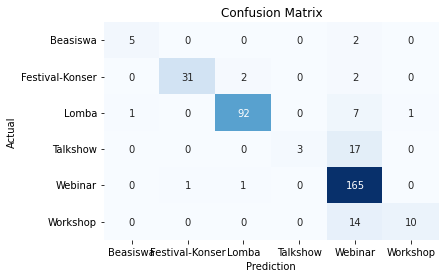

In [47]:
# Import confusion matrix dari sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion_mat(y_test,predict):
    cm = sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=False, fmt="d", cmap='Blues')
    cm.set_title('Confusion Matrix')
    cm.set_ylabel('Actual')
    cm.set_xlabel('Prediction')
    
    cm.yaxis.set_ticklabels(['Beasiswa', 'Festival-Konser', 'Lomba', 'Talkshow', 'Webinar', 'Workshop'], rotation=0)
    cm.xaxis.set_ticklabels(['Beasiswa', 'Festival-Konser', 'Lomba', 'Talkshow', 'Webinar', 'Workshop'])
    
    plt.show()

# Memanggil fungsi untuk menampilkan visualisasi confusion matrix
confusion_mat(y_test,predict)

In [48]:
# import pickle

# pkl_cosine_filename="pickle_cosine.pkl"
# with open(pkl_cosine_filename, 'wb') as file:
#     pickle.dump(cosine_sim, file)

In [49]:
# pkl_event_keys_filename="pickle_event_keys.pkl"
# with open(pkl_event_keys_filename, 'wb') as file:
#     pickle.dump(event_keys, file)

In [50]:
# pkl_event_filename="pickle_event.pkl"
# with open(pkl_event_filename, 'wb') as file:
#     pickle.dump(event, file)

In [51]:
# pkl_rec_filename="pickle_recommendation.pkl"
# with open(pkl_rec_filename, 'wb') as file:
#     pickle.dump(recommendations, file)

In [52]:
# with open(pkl_rec_filename,'rb') as file:
#     pickle_model=pickle.load(file)

# pickle_model('event001')
# # print(pickle_model)
